## This notebook includes:

#### 2) train a feedforwd network and a CNN on [CIFAR-10](https://www.cs.toronto.edu/~kriz/cifar.html)

#### 3) train a ResNet with 4 blocks

#### 6) fine-tune pre-trained AlexNet on CIFAR-10

## 1. Train a feedforward neural netwwork with one hidden layer on MNIST

In [ ]:
import torch 
import torch.nn as nn
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
import numpy

# Hyper-parameters for MNIST
input_size = 784
hidden_size = 500
num_classes = 10
num_epochs = 10
batch_size = 100
learning_rate = 0.001

# Device configuration
device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')


In [ ]:
# MNIST dataset
train_dataset = torchvision.datasets.MNIST(root='./data/',
                                           train=True, 
                                           transform=transforms.ToTensor(),
                                           download=True)

test_dataset = torchvision.datasets.MNIST(root='./data/',
                                          train=False, 
                                          transform=transforms.ToTensor())

# Data loader
train_loader = torch.utils.data.DataLoader(dataset=train_dataset,
                                           batch_size=batch_size, 
                                           shuffle=True)

test_loader = torch.utils.data.DataLoader(dataset=test_dataset,
                                          batch_size=batch_size, 
                                          shuffle=False)


  0%|          | 0/9912422 [00:00<?, ?it/s]

Extracting ./data/MNIST/raw/train-images-idx3-ubyte.gz to ./data/MNIST/raw



  0%|          | 0/28881 [00:00<?, ?it/s]

Extracting ./data/MNIST/raw/train-labels-idx1-ubyte.gz to ./data/MNIST/raw



  0%|          | 0/1648877 [00:00<?, ?it/s]

Extracting ./data/MNIST/raw/t10k-images-idx3-ubyte.gz to ./data/MNIST/raw



  0%|          | 0/4542 [00:00<?, ?it/s]

Extracting ./data/MNIST/raw/t10k-labels-idx1-ubyte.gz to ./data/MNIST/raw

Epoch [1/10], Step [100/600], Loss: 0.3375
Epoch [1/10], Step [200/600], Loss: 0.1824
Epoch [1/10], Step [300/600], Loss: 0.2129
Epoch [1/10], Step [400/600], Loss: 0.1187
Epoch [1/10], Step [500/600], Loss: 0.2059
Epoch [1/10], Step [600/600], Loss: 0.1602
Accuracy of the network on the 10000 test images: 95.43 %
Accuracy of the network on the training images: 95.91 %
Epoch [2/10], Step [100/600], Loss: 0.2434
Epoch [2/10], Step [200/600], Loss: 0.0529
Epoch [2/10], Step [300/600], Loss: 0.1070
Epoch [2/10], Step [400/600], Loss: 0.0910
Epoch [2/10], Step [500/600], Loss: 0.0978
Epoch [2/10], Step [600/600], Loss: 0.0603
Accuracy of the network on the 10000 test images: 97.11 %
Accuracy of the network on the training images: 97.77833333333334 %
Epoch [3/10], Step [100/600], Loss: 0.1144
Epoch [3/10], Step [200/600], Loss: 0.0558
Epoch [3/10], Step [300/600], Loss: 0.0629
Epoch [3/10], Step [400/600], Loss: 0.08

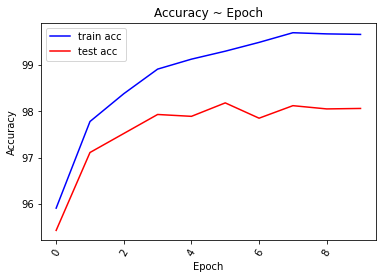

In [ ]:
# Fully connected neural network with one hidden layer
class NeuralNet(nn.Module):
    def __init__(self, input_size, hidden_size, num_classes):
        super(NeuralNet, self).__init__()
        self.fc1 = nn.Linear(input_size, hidden_size) 
        self.relu = nn.ReLU()
        self.fc2 = nn.Linear(hidden_size, num_classes)  
    
    def forward(self, x):
        out = self.fc1(x)
        out = self.relu(out)
        out = self.fc2(out)
        return out
    
    
model_NN = NeuralNet(input_size, hidden_size, num_classes).to(device)

# Loss and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model_NN.parameters(), lr=learning_rate, weight_decay=0.00001)  

# Train the model_NN
total_step = len(train_loader)
test_acc_list, train_acc_list = [], []
for epoch in range(num_epochs):
    for i, (images, labels) in enumerate(train_loader):  
        # Move tensors to the configured device
        images = images.reshape(-1, 28*28).to(device)
        labels = labels.to(device)
        
        # Forward pass
        outputs = model_NN(images)
        loss = criterion(outputs, labels)
        
        # Backward and optimize
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        
        if (i+1) % 100 == 0:
            print ('Epoch [{}/{}], Step [{}/{}], Loss: {:.4f}' 
                   .format(epoch+1, num_epochs, i+1, total_step, loss.item()))

    # Test the model_NN
    # In test phase, we don't need to compute gradients (for memory efficiency)
    with torch.no_grad():
        correct = 0
        total = 0
        for images, labels in test_loader:
            images = images.reshape(-1, 28*28).to(device)
            labels = labels.to(device)
            outputs = model_NN(images)
            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()

        print('Accuracy of the network on the 10000 test images: {} %'.format(100 * correct / total))
        test_acc_list.append(100 * correct / total)

    with torch.no_grad():
        correct = 0
        total = 0
        for images, labels in train_loader:
            images = images.reshape(-1, 28*28).to(device)
            labels = labels.to(device)
            outputs = model_NN(images)
            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()

        print('Accuracy of the network on the training images: {} %'.format(100 * correct / total))
        train_acc_list.append(100 * correct / total)

        
        
plt.plot(train_acc_list, '-b', label='train acc')
plt.plot(test_acc_list, '-r', label='test acc')
plt.legend()
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.xticks(rotation=60)
plt.title('Accuracy ~ Epoch')
# plt.savefig('assets/accr_{}.png'.format(cfg_idx))
plt.show()


# Save the model_NN checkpoint
torch.save(model_NN.state_dict(), 'model_NN.ckpt')

## 2. Train a convolutional neural network on MNIST. 

Epoch [1/10], Step [100/600], Loss: 0.2508
Epoch [1/10], Step [200/600], Loss: 0.0462
Epoch [1/10], Step [300/600], Loss: 0.0293
Epoch [1/10], Step [400/600], Loss: 0.0277
Epoch [1/10], Step [500/600], Loss: 0.1122
Epoch [1/10], Step [600/600], Loss: 0.0223
Test Accuracy of the model_conv on the 10000 test images: 98.44 %
Test Accuracy of the model_conv on the train images: 98.49666666666667 %
Epoch [2/10], Step [100/600], Loss: 0.0398
Epoch [2/10], Step [200/600], Loss: 0.0241
Epoch [2/10], Step [300/600], Loss: 0.0617
Epoch [2/10], Step [400/600], Loss: 0.0330
Epoch [2/10], Step [500/600], Loss: 0.2092
Epoch [2/10], Step [600/600], Loss: 0.0932
Test Accuracy of the model_conv on the 10000 test images: 98.59 %
Test Accuracy of the model_conv on the train images: 98.83166666666666 %
Epoch [3/10], Step [100/600], Loss: 0.0937
Epoch [3/10], Step [200/600], Loss: 0.0297
Epoch [3/10], Step [300/600], Loss: 0.0068
Epoch [3/10], Step [400/600], Loss: 0.0094
Epoch [3/10], Step [500/600], Loss

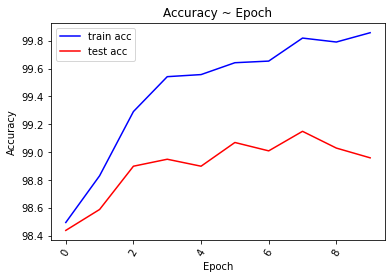

In [ ]:
# Convolutional neural network (two convolutional layers)
class ConvNet(nn.Module):
    def __init__(self, num_classes=10):
        super(ConvNet, self).__init__()
        self.layer1 = nn.Sequential(
            nn.Conv2d(1, 16, kernel_size=5, stride=1, padding=2),
            nn.BatchNorm2d(16),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2, stride=2))
        self.layer2 = nn.Sequential(
            nn.Conv2d(16, 32, kernel_size=5, stride=1, padding=2),
            nn.BatchNorm2d(32),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2, stride=2))
        self.fc = nn.Linear(7*7*32, num_classes)
        
    def forward(self, x):
        out = self.layer1(x)
        out = self.layer2(out)
        out = out.reshape(out.size(0), -1)
        out = self.fc(out)
        return out
    
    
model_conv = ConvNet(num_classes).to(device)

# Loss and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model_conv.parameters(), lr=learning_rate)

# Train the model_conv
total_step = len(train_loader)
test_acc_list, train_acc_list = [], []
for epoch in range(num_epochs):
    for i, (images, labels) in enumerate(train_loader):
        images = images.to(device)
        labels = labels.to(device)
        
        # Forward pass
        outputs = model_conv(images)
        loss = criterion(outputs, labels)
        
        # Backward and optimize
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        
        if (i+1) % 100 == 0:
            print ('Epoch [{}/{}], Step [{}/{}], Loss: {:.4f}' 
                   .format(epoch+1, num_epochs, i+1, total_step, loss.item()))

    # Test the model_conv
    model_conv.eval()  # eval mode (batchnorm uses moving mean/variance instead of mini-batch mean/variance)
    with torch.no_grad():
        correct = 0
        total = 0
        for images, labels in test_loader:
            images = images.to(device)
            labels = labels.to(device)
            outputs = model_conv(images)
            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()

        print('Test Accuracy of the model_conv on the 10000 test images: {} %'.format(100 * correct / total))
        test_acc_list.append(100 * correct / total)

    with torch.no_grad():
        correct = 0
        total = 0
        for images, labels in train_loader:
            images = images.to(device)
            labels = labels.to(device)
            outputs = model_conv(images)
            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()

        print('Test Accuracy of the model_conv on the train images: {} %'.format(100 * correct / total))
        train_acc_list.append(100 * correct / total)

        
        
plt.plot(train_acc_list, '-b', label='train acc')
plt.plot(test_acc_list, '-r', label='test acc')
plt.legend()
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.xticks(rotation=60)
plt.title('Accuracy ~ Epoch')
# plt.savefig('assets/accr_{}.png'.format(cfg_idx))
plt.show()


# Save the model_conv checkpoint
torch.save(model_conv.state_dict(), 'model_conv.ckpt')

## 3. Train a feedforward neural network and a convolutional neural network on [CIFAR-10](https://www.cs.toronto.edu/~kriz/cifar.html), respectively.

In [ ]:
# CIFAR10 dataset
train_dataset = torchvision.datasets.CIFAR10(root='./data/',
                                           train=True, 
                                           transform=transforms.ToTensor(),
                                           download=True)

test_dataset = torchvision.datasets.CIFAR10(root='./data/',
                                          train=False, 
                                          transform=transforms.ToTensor())

# Data loader
train_loader = torch.utils.data.DataLoader(dataset=train_dataset,
                                           batch_size=batch_size, 
                                           shuffle=True)

test_loader = torch.utils.data.DataLoader(dataset=test_dataset,
                                          batch_size=batch_size, 
                                          shuffle=False)
# Parameters  
input_size = 32*32*3
num_classes = 10
num_epochs = 50
batch_size = 100



Files already downloaded and verified


Epoch [1/50], Step [100/500], Loss: 2.0835
Epoch [1/50], Step [200/500], Loss: 2.0161
Epoch [1/50], Step [300/500], Loss: 1.8902
Epoch [1/50], Step [400/500], Loss: 1.8615
Epoch [1/50], Step [500/500], Loss: 1.9020
Accuracy of the network on the 10000 test images: 36.29 %
Accuracy of the network on the training images: 37.14 %
Epoch [2/50], Step [100/500], Loss: 1.8598
Epoch [2/50], Step [200/500], Loss: 1.8844
Epoch [2/50], Step [300/500], Loss: 1.7957
Epoch [2/50], Step [400/500], Loss: 1.6636
Epoch [2/50], Step [500/500], Loss: 1.6112
Accuracy of the network on the 10000 test images: 39.26 %
Accuracy of the network on the training images: 39.748 %
Epoch [3/50], Step [100/500], Loss: 1.7848
Epoch [3/50], Step [200/500], Loss: 1.5405
Epoch [3/50], Step [300/500], Loss: 1.6639
Epoch [3/50], Step [400/500], Loss: 1.5724
Epoch [3/50], Step [500/500], Loss: 1.8723
Accuracy of the network on the 10000 test images: 42.12 %
Accuracy of the network on the training images: 42.93 %
Epoch [4/50]

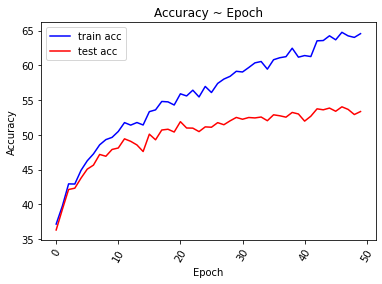

In [ ]:
# ----------- feedforward neural network -----------
learning_rate = 0.0001    
model_NN = NeuralNet(input_size, hidden_size, num_classes).to(device)

# Loss and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model_NN.parameters(), lr=learning_rate, weight_decay=0.00001)  

# Train the model_NN
total_step = len(train_loader)
test_acc_list, train_acc_list = [], []
for epoch in range(num_epochs):
    for i, (images, labels) in enumerate(train_loader):  
        # Move tensors to the configured device
        images = images.reshape(-1, input_size).to(device)
        labels = labels.to(device)
        
        # Forward pass
        outputs = model_NN(images)
        loss = criterion(outputs, labels)
        
        # Backward and optimize
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        
        if (i+1) % 100 == 0:
            print ('Epoch [{}/{}], Step [{}/{}], Loss: {:.4f}' 
                   .format(epoch+1, num_epochs, i+1, total_step, loss.item()))

    # Test the model_NN
    # In test phase, we don't need to compute gradients (for memory efficiency)
    with torch.no_grad():
        correct = 0
        total = 0
        for images, labels in test_loader:
            images = images.reshape(-1, input_size).to(device)
            labels = labels.to(device)
            outputs = model_NN(images)
            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()

        print('Accuracy of the network on the 10000 test images: {} %'.format(100 * correct / total))
        test_acc_list.append(100 * correct / total)

    with torch.no_grad():
        correct = 0
        total = 0
        for images, labels in train_loader:
            images = images.reshape(-1, input_size).to(device)
            labels = labels.to(device)
            outputs = model_NN(images)
            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()

        print('Accuracy of the network on the training images: {} %'.format(100 * correct / total))
        train_acc_list.append(100 * correct / total)

        
        
plt.plot(train_acc_list, '-b', label='train acc')
plt.plot(test_acc_list, '-r', label='test acc')
plt.legend()
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.xticks(rotation=60)
plt.title('Accuracy ~ Epoch')
# plt.savefig('assets/accr_{}.png'.format(cfg_idx))
plt.show()


# Save the model_NN checkpoint
torch.save(model_NN.state_dict(), 'model_NN.ckpt')


Epoch [1/45], Step [100/500], Loss: 1.9392
Epoch [1/45], Step [200/500], Loss: 1.8251
Epoch [1/45], Step [300/500], Loss: 1.7459
Epoch [1/45], Step [400/500], Loss: 1.6602
Epoch [1/45], Step [500/500], Loss: 1.5416
Test Accuracy of the model_conv on the 10000 test images: 46.36 %
Test Accuracy of the model_conv on the train images: 42.826 %
Epoch [2/45], Step [100/500], Loss: 1.4692
Epoch [2/45], Step [200/500], Loss: 1.4910
Epoch [2/45], Step [300/500], Loss: 1.4813
Epoch [2/45], Step [400/500], Loss: 1.5676
Epoch [2/45], Step [500/500], Loss: 1.5626
Test Accuracy of the model_conv on the 10000 test images: 50.75 %
Test Accuracy of the model_conv on the train images: 47.73 %
Epoch [3/45], Step [100/500], Loss: 1.6797
Epoch [3/45], Step [200/500], Loss: 1.2748
Epoch [3/45], Step [300/500], Loss: 1.2891
Epoch [3/45], Step [400/500], Loss: 1.4013
Epoch [3/45], Step [500/500], Loss: 1.3468
Test Accuracy of the model_conv on the 10000 test images: 52.83 %
Test Accuracy of the model_conv on

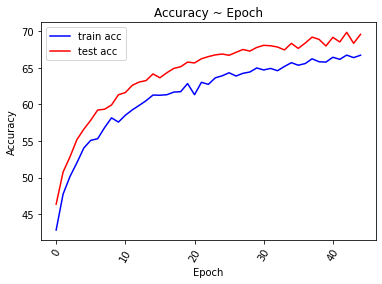

In [ ]:
# ----------- convolutional neural network -----------
learning_rate = 0.0001
class ConvNetCifar10(ConvNet): 
  def __init__(self, num_classes=10):
        super().__init__()
        self.layer1 = nn.Sequential(
            nn.Conv2d(3, 16, kernel_size=5, stride=1, padding=2),
            nn.BatchNorm2d(16),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2, stride=2))
        self.fc = nn.Linear(8*8*32, num_classes)
model_conv = ConvNetCifar10(num_classes).to(device)

# Loss and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model_conv.parameters(), lr=learning_rate)

# Train the model_conv
total_step = len(train_loader)
test_acc_list, train_acc_list = [], []
for epoch in range(num_epochs):
    for i, (images, labels) in enumerate(train_loader):
        images = images.to(device)
        labels = labels.to(device)
        
        # Forward pass
        outputs = model_conv(images)
        loss = criterion(outputs, labels)
        
        # Backward and optimize
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        
        if (i+1) % 100 == 0:
            print ('Epoch [{}/{}], Step [{}/{}], Loss: {:.4f}' 
                   .format(epoch+1, num_epochs, i+1, total_step, loss.item()))

    # Test the model_conv
    model_conv.eval()  # eval mode (batchnorm uses moving mean/variance instead of mini-batch mean/variance)
    with torch.no_grad():
        correct = 0
        total = 0
        for images, labels in test_loader:
            images = images.to(device)
            labels = labels.to(device)
            outputs = model_conv(images)
            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()

        print('Test Accuracy of the model_conv on the 10000 test images: {} %'.format(100 * correct / total))
        test_acc_list.append(100 * correct / total)

    with torch.no_grad():
        correct = 0
        total = 0
        for images, labels in train_loader:
            images = images.to(device)
            labels = labels.to(device)
            outputs = model_conv(images)
            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()

        print('Test Accuracy of the model_conv on the train images: {} %'.format(100 * correct / total))
        train_acc_list.append(100 * correct / total)

        
        
plt.plot(train_acc_list, '-b', label='train acc')
plt.plot(test_acc_list, '-r', label='test acc')
plt.legend()
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.xticks(rotation=60)
plt.title('Accuracy ~ Epoch')
# plt.savefig('assets/accr_{}.png'.format(cfg_idx))
plt.show()


# Save the model_conv checkpoint
torch.save(model_conv.state_dict(), 'model_conv.ckpt')



## 4. Train a ResNet with three blocks on CIFAR-10

Files already downloaded and verified
Epoch [1/45], Step [100/500] Loss: 1.6296
Epoch [1/45], Step [200/500] Loss: 1.2945
Epoch [1/45], Step [300/500] Loss: 1.3282
Epoch [1/45], Step [400/500] Loss: 1.2709
Epoch [1/45], Step [500/500] Loss: 1.2180
Accuracy of the model on the test images: 54.55 %
Accuracy of the model on the train images: 54.298 %
Epoch [2/45], Step [100/500] Loss: 0.9630
Epoch [2/45], Step [200/500] Loss: 1.1261
Epoch [2/45], Step [300/500] Loss: 0.9640
Epoch [2/45], Step [400/500] Loss: 1.0171
Epoch [2/45], Step [500/500] Loss: 1.2083
Accuracy of the model on the test images: 60.48 %
Accuracy of the model on the train images: 60.798 %
Epoch [3/45], Step [100/500] Loss: 0.9088
Epoch [3/45], Step [200/500] Loss: 0.8828
Epoch [3/45], Step [300/500] Loss: 0.8888
Epoch [3/45], Step [400/500] Loss: 0.7752
Epoch [3/45], Step [500/500] Loss: 0.8128
Accuracy of the model on the test images: 65.29 %
Accuracy of the model on the train images: 65.808 %
Epoch [4/45], Step [100/50

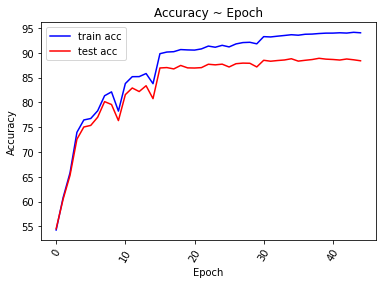

In [ ]:
# Device configuration
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# Hyper-parameters1
num_epochs = 45
batch_size = 100
learning_rate = 0.001

# Image preprocessing modules
transform = transforms.Compose([
    transforms.Pad(4),
    transforms.RandomHorizontalFlip(),
    transforms.RandomCrop(32),
    transforms.ToTensor()])

# CIFAR-10 dataset
train_dataset = torchvision.datasets.CIFAR10(root='./data/',
                                             train=True, 
                                             transform=transform,
                                             download=True)

test_dataset = torchvision.datasets.CIFAR10(root='./data/',
                                            train=False, 
                                            transform=transforms.ToTensor())

# Data loader
train_loader = torch.utils.data.DataLoader(dataset=train_dataset,
                                           batch_size=batch_size,
                                           shuffle=True)

test_loader = torch.utils.data.DataLoader(dataset=test_dataset,
                                          batch_size=batch_size,
                                          shuffle=False)

# 3x3 convolution
def conv3x3(in_channels, out_channels, stride=1):
    return nn.Conv2d(in_channels, out_channels, kernel_size=3, 
                     stride=stride, padding=1, bias=False)

# Residual block
class ResidualBlock(nn.Module):
    def __init__(self, in_channels, out_channels, stride=1, downsample=None):
        super(ResidualBlock, self).__init__()
        self.conv1 = conv3x3(in_channels, out_channels, stride)
        self.bn1 = nn.BatchNorm2d(out_channels)
        self.relu = nn.ReLU(inplace=True)
        self.conv2 = conv3x3(out_channels, out_channels)
        self.bn2 = nn.BatchNorm2d(out_channels)
        self.downsample = downsample
        
    def forward(self, x):
        residual = x
        out = self.conv1(x)
        out = self.bn1(out)
        out = self.relu(out)
        out = self.conv2(out)
        out = self.bn2(out)
        if self.downsample:
            residual = self.downsample(x)
        out += residual
        out = self.relu(out)
        return out

# ResNet
class ResNet(nn.Module):
    def __init__(self, block, layers, num_classes=10):
        super(ResNet, self).__init__()
        self.in_channels = 16
        self.conv = conv3x3(3, 16)
        self.bn = nn.BatchNorm2d(16)
        self.relu = nn.ReLU(inplace=True)
        self.layer1 = self.make_layer(block, 16, layers[0])
        self.layer2 = self.make_layer(block, 32, layers[1], 2)
        self.layer3 = self.make_layer(block, 64, layers[2], 2)
        self.avg_pool = nn.AvgPool2d(8)
        self.fc = nn.Linear(64, num_classes)
        
    def make_layer(self, block, out_channels, blocks, stride=1):
        downsample = None
        if (stride != 1) or (self.in_channels != out_channels):
            downsample = nn.Sequential(
                conv3x3(self.in_channels, out_channels, stride=stride),
                nn.BatchNorm2d(out_channels))
        layers = []
        layers.append(block(self.in_channels, out_channels, stride, downsample))
        self.in_channels = out_channels
        for i in range(1, blocks):
            layers.append(block(out_channels, out_channels))
        return nn.Sequential(*layers)
    
    def forward(self, x):
        out = self.conv(x)
        out = self.bn(out)
        out = self.relu(out)
        out = self.layer1(out)
        out = self.layer2(out)
        out = self.layer3(out)
        out = self.avg_pool(out)
        out = out.view(out.size(0), -1)
        out = self.fc(out)
        return out
    
model = ResNet(ResidualBlock, [2, 2, 2]).to(device)


# Loss and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)

# For updating learning rate
def update_lr(optimizer, lr):    
    for param_group in optimizer.param_groups:
        param_group['lr'] = lr

# Train the model
total_step = len(train_loader)
train_acc_list, test_acc_list = [], []
curr_lr = learning_rate
for epoch in range(num_epochs):
    for i, (images, labels) in enumerate(train_loader):
        images = images.to(device)
        labels = labels.to(device)
        
        # Forward pass
        outputs = model(images)
        loss = criterion(outputs, labels)
        
        # Backward and optimize
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        
        if (i+1) % 100 == 0:
            print ("Epoch [{}/{}], Step [{}/{}] Loss: {:.4f}"
                   .format(epoch+1, num_epochs, i+1, total_step, loss.item()))

    # Decay learning rate
    if (epoch+1) % 15 == 0:
        curr_lr /= 3
        update_lr(optimizer, curr_lr)

    # Test the model
    model.eval()
    with torch.no_grad():
        correct = 0
        total = 0
        for images, labels in test_loader:
            images = images.to(device)
            labels = labels.to(device)
            outputs = model(images)
            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()

    print('Accuracy of the model on the test images: {} %'.format(100 * correct / total))
    test_acc_list.append(100 * correct / total)


    with torch.no_grad():
        correct = 0
        total = 0
        for images, labels in train_loader:
            images = images.to(device)
            labels = labels.to(device)
            outputs = model(images)
            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()

    print('Accuracy of the model on the train images: {} %'.format(100 * correct / total))
    train_acc_list.append(100 * correct / total)

    model.train()
    

plt.plot(train_acc_list, '-b', label='train acc')
plt.plot(test_acc_list, '-r', label='test acc')
plt.legend()
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.xticks(rotation=60)
plt.title('Accuracy ~ Epoch')
# plt.savefig('assets/accr_{}.png'.format(cfg_idx))
plt.show()



# Save the model checkpoint
torch.save(model.state_dict(), 'resnet.ckpt')

## 5. Train a ResNet with four blocks


Epoch [1/50], Step [100/500] Loss: 1.2878
Epoch [1/50], Step [200/500] Loss: 1.4497
Epoch [1/50], Step [300/500] Loss: 1.2167
Epoch [1/50], Step [400/500] Loss: 1.0509
Epoch [1/50], Step [500/500] Loss: 1.0317
Accuracy of the model on the test images: 59.02 %
Accuracy of the model on the train images: 60.476 %
Epoch [2/50], Step [100/500] Loss: 0.9619
Epoch [2/50], Step [200/500] Loss: 1.0504
Epoch [2/50], Step [300/500] Loss: 0.8676
Epoch [2/50], Step [400/500] Loss: 0.9157
Epoch [2/50], Step [500/500] Loss: 0.7970
Accuracy of the model on the test images: 67.24 %
Accuracy of the model on the train images: 69.302 %
Epoch [3/50], Step [100/500] Loss: 0.6855
Epoch [3/50], Step [200/500] Loss: 0.5508
Epoch [3/50], Step [300/500] Loss: 0.6160
Epoch [3/50], Step [400/500] Loss: 0.6487
Epoch [3/50], Step [500/500] Loss: 0.6695
Accuracy of the model on the test images: 71.81 %
Accuracy of the model on the train images: 74.98 %
Epoch [4/50], Step [100/500] Loss: 0.7043
Epoch [4/50], Step [200

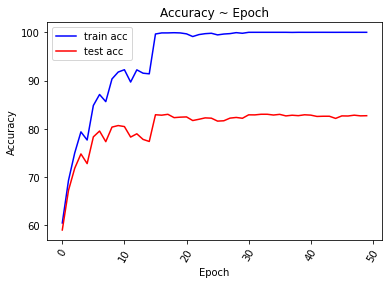

In [ ]:
# Device configuration
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# Image preprocessing modules
transform = transforms.Compose([
    transforms.Pad(4),
    transforms.RandomHorizontalFlip(),
    transforms.RandomCrop(32),
    transforms.ToTensor()])


# Data loader
train_loader = torch.utils.data.DataLoader(dataset=train_dataset,
                                           batch_size=batch_size,
                                           shuffle=True)

test_loader = torch.utils.data.DataLoader(dataset=test_dataset,
                                          batch_size=batch_size,
                                          shuffle=False)

# 3x3 convolution
def conv3x3(in_channels, out_channels, stride=1):
    return nn.Conv2d(in_channels, out_channels, kernel_size=3, 
                     stride=stride, padding=1, bias=False)

# Residual block
class ResidualBlock(nn.Module):
    def __init__(self, in_channels, out_channels, stride=1, downsample=None):
        super(ResidualBlock, self).__init__()
        self.conv1 = conv3x3(in_channels, out_channels, stride)
        self.bn1 = nn.BatchNorm2d(out_channels)
        self.relu = nn.ReLU(inplace=True)
        self.conv2 = conv3x3(out_channels, out_channels)
        self.bn2 = nn.BatchNorm2d(out_channels)
        self.downsample = downsample
        
    def forward(self, x):
        residual = x
        out = self.conv1(x)
        out = self.bn1(out)
        out = self.relu(out)
        out = self.conv2(out)
        out = self.bn2(out)
        if self.downsample:
            residual = self.downsample(x)
        out += residual
        out = self.relu(out)
        return out

# ResNet
class ResNet(nn.Module):
    def __init__(self, block, layers, num_classes=10):
        super(ResNet, self).__init__()
        self.in_channels = 16
        self.conv = conv3x3(3, 16)
        self.bn = nn.BatchNorm2d(16)
        self.relu = nn.ReLU(inplace=True)
        self.layer1 = self.make_layer(block, 16, layers[0])
        self.layer2 = self.make_layer(block, 32, layers[1], 2)
        self.layer3 = self.make_layer(block, 64, layers[2], 2)
        self.layer4 = self.make_layer(block, 64, layers[3], 1)
        self.avg_pool = nn.AvgPool2d(8)
        self.fc = nn.Linear(64, num_classes)
        
    def make_layer(self, block, out_channels, blocks, stride=1):
        downsample = None
        if (stride != 1) or (self.in_channels != out_channels):
            downsample = nn.Sequential(
                conv3x3(self.in_channels, out_channels, stride=stride),
                nn.BatchNorm2d(out_channels))
        layers = []
        layers.append(block(self.in_channels, out_channels, stride, downsample))
        self.in_channels = out_channels
        for i in range(1, blocks):
            layers.append(block(out_channels, out_channels))
        return nn.Sequential(*layers)
    
    def forward(self, x):
        out = self.conv(x)
        out = self.bn(out)
        out = self.relu(out)
        out = self.layer1(out)
        out = self.layer2(out)
        out = self.layer3(out)
        out = self.layer4(out)
        out = self.avg_pool(out)
        out = out.view(out.size(0), -1)
        out = self.fc(out)
        return out
    
model = ResNet(ResidualBlock, [2, 2, 2, 2]).to(device)


# Loss and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)

# For updating learning rate
def update_lr(optimizer, lr):    
    for param_group in optimizer.param_groups:
        param_group['lr'] = lr

# Train the model
total_step = len(train_loader)
train_acc_list, test_acc_list = [], []
curr_lr = learning_rate
for epoch in range(num_epochs):
    for i, (images, labels) in enumerate(train_loader):
        images = images.to(device)
        labels = labels.to(device)
        
        # Forward pass
        outputs = model(images)
        loss = criterion(outputs, labels)
        
        # Backward and optimize
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        
        if (i+1) % 100 == 0:
            print ("Epoch [{}/{}], Step [{}/{}] Loss: {:.4f}"
                   .format(epoch+1, num_epochs, i+1, total_step, loss.item()))

    # Decay learning rate
    if (epoch+1) % 15 == 0:
        curr_lr /= 3
        update_lr(optimizer, curr_lr)

    # Test the model
    model.eval()
    with torch.no_grad():
        correct = 0
        total = 0
        for images, labels in test_loader:
            images = images.to(device)
            labels = labels.to(device)
            outputs = model(images)
            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()

    print('Accuracy of the model on the test images: {} %'.format(100 * correct / total))
    test_acc_list.append(100 * correct / total)


    with torch.no_grad():
        correct = 0
        total = 0
        for images, labels in train_loader:
            images = images.to(device)
            labels = labels.to(device)
            outputs = model(images)
            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()

    print('Accuracy of the model on the train images: {} %'.format(100 * correct / total))
    train_acc_list.append(100 * correct / total)

    model.train()
    

plt.plot(train_acc_list, '-b', label='train acc')
plt.plot(test_acc_list, '-r', label='test acc')
plt.legend()
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.xticks(rotation=60)
plt.title('Accuracy ~ Epoch')
# plt.savefig('assets/accr_{}.png'.format(cfg_idx))
plt.show()

# Save the model checkpoint
torch.save(model.state_dict(), 'resnet.ckpt')




## 8. Fine tune a pre-trained AlexNet on CIFAR-10

Files already downloaded and verified
Epoch [1/50], Step [100/500] Loss: 2.2314
Epoch [1/50], Step [200/500] Loss: 2.0097
Epoch [1/50], Step [300/500] Loss: 2.0910
Epoch [1/50], Step [400/500] Loss: 2.0548
Epoch [1/50], Step [500/500] Loss: 1.8475
Accuracy of the model on the test images: 33.7 %
Accuracy of the model on the train images: 29.566 %
Epoch [2/50], Step [100/500] Loss: 1.9351
Epoch [2/50], Step [200/500] Loss: 1.8187
Epoch [2/50], Step [300/500] Loss: 1.9126
Epoch [2/50], Step [400/500] Loss: 1.7531
Epoch [2/50], Step [500/500] Loss: 1.8329
Accuracy of the model on the test images: 40.85 %
Accuracy of the model on the train images: 34.886 %
Epoch [3/50], Step [100/500] Loss: 1.7207
Epoch [3/50], Step [200/500] Loss: 1.7207
Epoch [3/50], Step [300/500] Loss: 1.6542
Epoch [3/50], Step [400/500] Loss: 1.8251
Epoch [3/50], Step [500/500] Loss: 1.8258
Accuracy of the model on the test images: 43.62 %
Accuracy of the model on the train images: 38.082 %
Epoch [4/50], Step [100/500

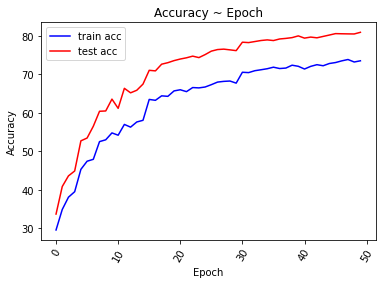

In [2]:

import torch
import torch.nn as nn
import torch.optim as optim
import numpy as np
import torchvision
from torchvision import datasets, models, transforms
import matplotlib.pyplot as plt
import time
import os
import copy
import cv2

device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')

# Parameters 
input_size = (224, 224)
num_classes = 10
num_epochs = 50
batch_size = 100
learning_rate = 0.001

# CIFAR10 dataset
train_dataset = torchvision.datasets.CIFAR10(root='./data/',
                                           train=True, 
                                           transform=transforms.Compose([
                                               transforms.RandomResizedCrop(input_size), 
                                               transforms.RandomHorizontalFlip(), 
                                               transforms.ToTensor(), 
                                               transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
                                           ]),
                                           download=True)

test_dataset = torchvision.datasets.CIFAR10(root='./data/',
                                          train=False, 
                                          transform=transforms.Compose([
                                              transforms.Resize(input_size),
                                              transforms.CenterCrop(input_size),
                                              transforms.ToTensor(),
                                              transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
                                          ]))

# Data loader
train_loader = torch.utils.data.DataLoader(dataset=train_dataset,
                                           batch_size=batch_size, 
                                           shuffle=True)

test_loader = torch.utils.data.DataLoader(dataset=test_dataset,
                                          batch_size=batch_size, 
                                          shuffle=False)


pretrained = True 
feature_extract = False

def set_parameter_requires_grad(model, feature_extracting):
    if feature_extracting:
        for param in model.parameters():
            param.requires_grad = False

model = models.alexnet(pretrained=True)
set_parameter_requires_grad(model, feature_extract)
num_ftrs = model.classifier[6].in_features
model.classifier[6] = nn.Linear(num_ftrs,num_classes)

model = model.to(device)

# Loss and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)

# For updating learning rate
def update_lr(optimizer, lr):    
    for param_group in optimizer.param_groups:
        param_group['lr'] = lr

# Train the model
total_step = len(train_loader)
train_acc_list, test_acc_list = [], []
curr_lr = learning_rate
for epoch in range(num_epochs):
    for i, (images, labels) in enumerate(train_loader):
        images = images.to(device)
        labels = labels.to(device)
        
        # Forward pass
        outputs = model(images)
        loss = criterion(outputs, labels)
        
        # Backward and optimize
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        
        if (i+1) % 100 == 0:
            print ("Epoch [{}/{}], Step [{}/{}] Loss: {:.4f}"
                   .format(epoch+1, num_epochs, i+1, total_step, loss.item()))

    # Decay learning rate
    if (epoch+1) % 15 == 0:
        curr_lr /= 3
        update_lr(optimizer, curr_lr)

    # Test the model
    model.eval()
    with torch.no_grad():
        correct = 0
        total = 0
        for images, labels in test_loader:
            images = images.to(device)
            labels = labels.to(device)
            outputs = model(images)
            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()

    print('Accuracy of the model on the test images: {} %'.format(100 * correct / total))
    test_acc_list.append(100 * correct / total)


    with torch.no_grad():
        correct = 0
        total = 0
        for images, labels in train_loader:
            images = images.to(device)
            labels = labels.to(device)
            outputs = model(images)
            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()

    print('Accuracy of the model on the train images: {} %'.format(100 * correct / total))
    train_acc_list.append(100 * correct / total)

    model.train()
    

plt.plot(train_acc_list, '-b', label='train acc')
plt.plot(test_acc_list, '-r', label='test acc')
plt.legend()
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.xticks(rotation=60)
plt.title('Accuracy ~ Epoch')
# plt.savefig('assets/accr_{}.png'.format(cfg_idx))
plt.show()

# Save the model checkpoint
torch.save(model.state_dict(), 'resnet.ckpt')


